In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL #pillow to handle images
import tensorflow as tf

In [44]:
import pathlib
dataset_url= "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
data_dir = tf.keras.utils.get_file('horse-or-human', origin=dataset_url)

In [45]:
data_dir

'C:\\Users\\admin\\.keras\\datasets\\horse-or-human'

In [46]:
data_dir= pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human')

In [47]:
os.listdir("C:/Users/admin/.keras/datasets/horse-or-human")

['horses', 'humans']

In [48]:
os.listdir("C:/Users/admin/.keras/datasets/horse-or-human/horses")

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png',
 'horse01-5.png',
 'horse01-6.png',
 'horse01-7.png',
 'horse01-8.png',
 'horse01-9.png',
 'horse02-0.png',
 'horse02-1.png',
 'horse02-2.png',
 'horse02-3.png',
 'horse02-4.png',
 'horse02-5.png',
 'horse02-6.png',
 'horse02-7.png',
 'horse02-8.png',
 'horse02-9.png',
 'horse03-0.png',
 'horse03-1.png',
 'horse03-2.png',
 'horse03-3.png',
 'horse03-4.png',
 'horse03-5.png',
 'horse03-6.png',
 'horse03-7.png',
 'horse03-8.png',
 'horse03-9.png',
 'horse04-0.png',
 'horse04-1.png',
 'horse04-2.png',
 'horse04-3.png',
 'horse04-4.png',
 'horse04-5.png',
 'horse04-6.png',
 'horse04-7.png',
 'horse04-8.png',
 'horse04-9.png',
 'horse05-0.png',
 'horse05-1.png',
 'horse05-2.png',
 'horse05-3.png',
 'horse05-4.png',
 'horse05-5.png',
 'horse05-6.png',
 'horse05-7.png',
 'horse05-8.png',
 'horse05-9.png',
 'horse06-0.png',
 'horse06-1.png',
 'horse06-2.png',
 'horse06-3.png',
 'horse06-4.png',
 'horse06-

In [49]:
len(os.listdir("C:/Users/admin/.keras/datasets/horse-or-human/horses"))

500

In [50]:
os.listdir("C:/Users/admin/.keras/datasets/horse-or-human/humans")

['human01-00.png',
 'human01-01.png',
 'human01-02.png',
 'human01-03.png',
 'human01-04.png',
 'human01-05.png',
 'human01-06.png',
 'human01-07.png',
 'human01-08.png',
 'human01-09.png',
 'human01-10.png',
 'human01-11.png',
 'human01-12.png',
 'human01-13.png',
 'human01-14.png',
 'human01-15.png',
 'human01-16.png',
 'human01-17.png',
 'human01-18.png',
 'human01-19.png',
 'human01-20.png',
 'human01-21.png',
 'human01-22.png',
 'human01-23.png',
 'human01-24.png',
 'human01-25.png',
 'human01-26.png',
 'human01-27.png',
 'human01-28.png',
 'human01-29.png',
 'human01-30.png',
 'human02-00.png',
 'human02-01.png',
 'human02-02.png',
 'human02-03.png',
 'human02-04.png',
 'human02-05.png',
 'human02-06.png',
 'human02-07.png',
 'human02-08.png',
 'human02-09.png',
 'human02-10.png',
 'human02-11.png',
 'human02-12.png',
 'human02-13.png',
 'human02-14.png',
 'human02-15.png',
 'human02-16.png',
 'human02-17.png',
 'human02-18.png',
 'human02-19.png',
 'human02-20.png',
 'human02-21

In [51]:
len(os.listdir("C:/Users/admin/.keras/datasets/horse-or-human/humans"))

527

In [52]:
len(os.listdir("C:/Users/admin/.keras/datasets/horse-or-human/horses"))+len(os.listdir("C:/Users/admin/.keras/datasets/horse-or-human/humans"))

1027

In [53]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob   #to handle folder/Directory

In [54]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

1027


In [13]:
list(data_dir.glob('*'))

[WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans')]

In [14]:
list(data_dir.glob('horses/*'))

[WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-0.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-1.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-2.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-3.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-4.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-5.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-6.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-7.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-8.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-9.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse02-0.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse02-1

In [15]:
list(data_dir.glob('humans/*'))

[WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-00.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-01.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-02.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-03.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-04.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-05.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-06.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-07.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-08.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-09.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-10.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/human

In [16]:
list(data_dir.glob('*/*'))

[WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-0.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-1.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-2.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-3.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-4.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-5.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-6.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-7.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-8.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-9.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse02-0.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse02-1

In [17]:
len(list(data_dir.glob('*/*')))

1027

In [18]:
horse_count= len(list(data_dir.glob('horses/*')))
print(horse_count)

500


In [19]:
human_count= len(list(data_dir.glob('humans/*')))
print(human_count)

527


In [20]:
horse= list(data_dir.glob('horses/*'))
horse

[WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-0.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-1.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-2.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-3.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-4.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-5.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-6.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-7.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-8.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse01-9.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse02-0.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse02-1

In [21]:
human= list(data_dir.glob('humans/*'))
human

[WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-00.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-01.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-02.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-03.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-04.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-05.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-06.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-07.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-08.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-09.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-10.png'),
 WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/human

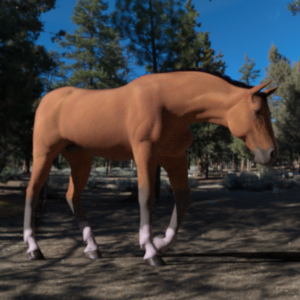

In [22]:
image.load_img('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse09-2.png')

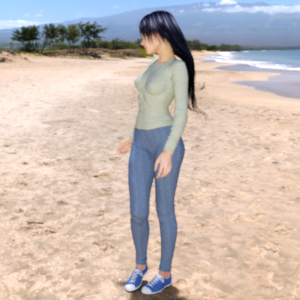

In [23]:
image.load_img('C:/Users/admin/.keras/datasets/horse-or-human/humans/human01-05.png')

In [24]:
horse[22]

WindowsPath('C:/Users/admin/.keras/datasets/horse-or-human/horses/horse03-2.png')

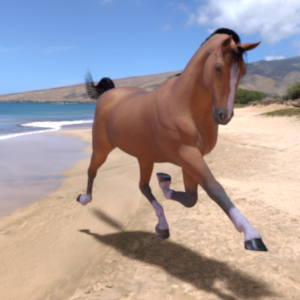

In [25]:
PIL.Image.open(str(horse[22]))

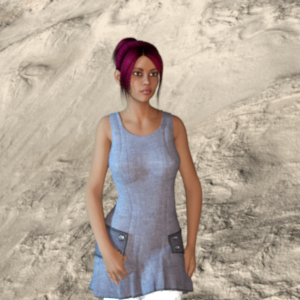

In [26]:
PIL.Image.open(str(human[200]))

In [27]:
batch_size = 50
epochs = 100
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [28]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [29]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 822 images belonging to 2 classes.


In [30]:
train_data_gen.class_indices

{'horses': 0, 'humans': 1}

In [31]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [32]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 205 images belonging to 2 classes.


In [33]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [35]:
sample_images,labels = next(train_data_gen)

In [36]:
sample_images.shape

(50, 224, 224, 3)

In [37]:
labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
filepath = 'horse_human.h5'

In [40]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_loss',
                            save_best_only=True,
                            mode='min')

In [41]:
callbacks= [checkpoint]

In [42]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=epochs,callbacks=callbacks)

Epoch 1/100
17/17 [==============================] - 242s 13s/step - loss: 0.7295 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
17/17 [==============================] - 244s 14s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
17/17 [==============================] - 247s 14s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
17/17 [==============================] - 1251s 77s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
17/17 [==============================] - 211s 12s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
17/17 [==============================] - 221s 13s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
17/17 [==============================] - 257s 15s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.500

17/17 [==============================] - 154s 9s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 59/100
17/17 [==============================] - 159s 9s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 60/100
17/17 [==============================] - 158s 9s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 61/100
17/17 [==============================] - 162s 9s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 62/100
17/17 [==============================] - 165s 9s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 63/100
17/17 [==============================] - 160s 9s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 64/100
17/17 [==============================] - 157s 9s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 65/100

In [55]:
model = tf.keras.models.load_model('horse_human.h5')

In [56]:
img = image.load_img('horse_img.jpg',target_size=(224,224))

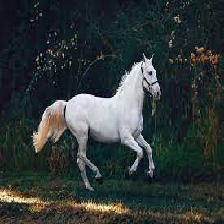

In [57]:
img

In [58]:
img_array = image.img_to_array(img)
img_array.shape

(224, 224, 3)

In [59]:
img_array = img_array.reshape(1,224, 224, 3)

In [60]:
img_array.shape

(1, 224, 224, 3)

In [61]:
model.predict(img_array)

array([[0.19102097]], dtype=float32)

In [65]:
class_name = ['horse', 'human']

In [66]:
np.argmax(model.predict(img_array),axis=-1)

array([0], dtype=int64)

In [67]:
np.argmax(model.predict(img_array),axis=-1)[0]

0

In [68]:
class_name[np.argmax(model.predict(img_array),axis=-1)[0]]

'horse'